In [1]:
import math
import random
import matplotlib.pyplot as plt 
import struct
import numpy as np
import scipy.special as ss
from fractions import Fraction
import copy

num_floats = 20

def float_to_mantissa_bytes(value):
    packed = struct.pack('>d', value)  
    packed_bits = struct.unpack('>Q', packed)[0]  
    
    mantissa = packed_bits & ((1 << 52) - 1)
    
    return f'{mantissa:052b}'

def generate_random_random_bits(n):
    res_str = ''
    for _ in range(n):
        res_str += float_to_mantissa_bytes(random.random())
    return res_str

bad strings amount:  24
bad strings ratio:  0.024


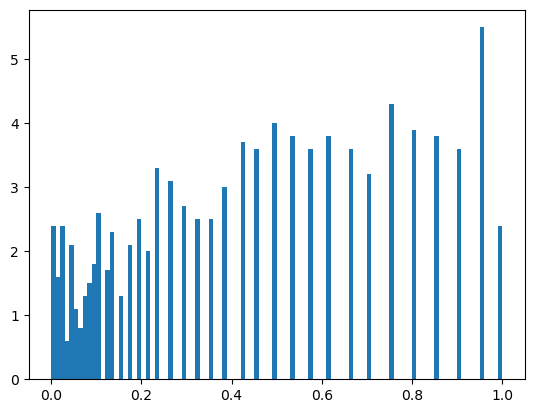

In [2]:
def test1(input):
    ones = input.count('1')
    zeroes = input.count('0')

    s_n = abs(ones - zeroes)  
    s_obs = float(s_n)/math.sqrt(float(len(input)))
    p_value = math.erfc(s_obs/math.sqrt(2.0))

    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test1(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True) 
plt.show()

bad strings amount:  26
bad strings ratio:  0.026


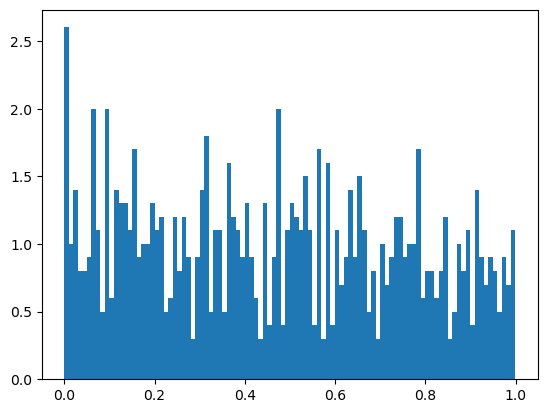

In [3]:
def test2(input, M=32):
    n = len(input)
    N = int(math.floor(n/M))
    
    if N > 99:
        N=99
        M = int(math.floor(n/N))
        
    proportions = []
    for i in range(N):  
        block = input[i*(M):((i+1)*(M))]
        ones = block.count('1')
        zeroes = block.count('0')    
        proportions.append(Fraction(ones,M))

    chisq = 0.0
    for prop in proportions:
        chisq += 4.0*M*((prop - Fraction(1,2))**2)
    
    p_value = ss.gammaincc((N/2.0),float(chisq)/2.0)
    
    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test2(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True) 
plt.show()

bad strings amount:  12
bad strings ratio:  0.012


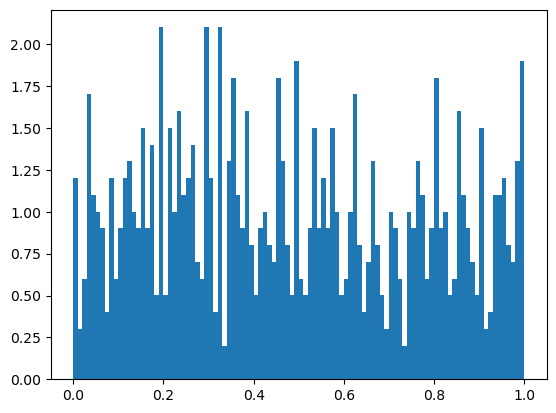

In [4]:
def test3(input):
    n = len(input)
    ones = input.count('1')
    zeroes = input.count('0')
    prop = float(ones)/float(n)

    tau = 2.0/math.sqrt(n)
    vobs = 0.0

    if abs(prop-0.5) > tau:
        return 0

    vobs = 1.0
    for i in range(n-1):
        if input[i] != input[i+1]:
            vobs += 1.0

    p_value = math.erfc(abs(vobs - (2.0*n*prop*(1.0-prop)))/(2.0*math.sqrt(2.0*n)*prop*(1-prop) ))
    
    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test3(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True) 
plt.show()

bad strings amount:  10
bad strings ratio:  0.01


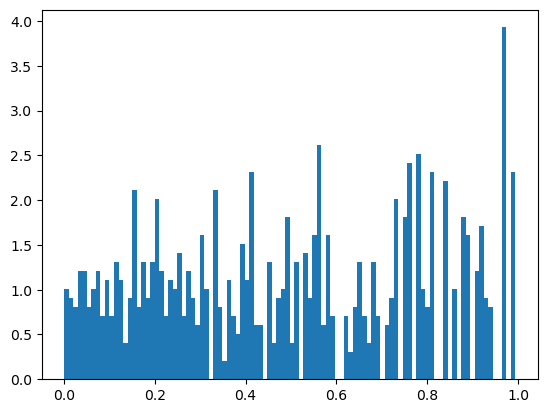

In [5]:
def test4(input):
    n = len(input)
    P = [0.2148, 0.3672, 0.2305, 0.1875]
    M = 8      
    K = 3
    N = 16
            
    v = [0,0,0,0,0,0,0]

    for i in range(N):
        block = input[i*M:((i+1)*M)]
        run = 0
        longest = 0
        for j in range(M):
            if block[j] == '1':
                run += 1
                if run > longest:
                    longest = run
            else:
                run = 0

        if longest <= 1:
            v[0] += 1
        elif longest == 2:
            v[1] += 1
        elif longest == 3:
            v[2] += 1
        else:
            v[3] += 1
    
    chi_sq = 0.0
    for i in range(K+1):
        chi_sq += ((v[i] - N*P[i])**2)/(N*P[i])

    p_value = ss.gammaincc(K/2.0, chi_sq/2.0)
    
    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test4(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True) 
plt.show()

bad strings amount:  10
bad strings ratio:  0.01


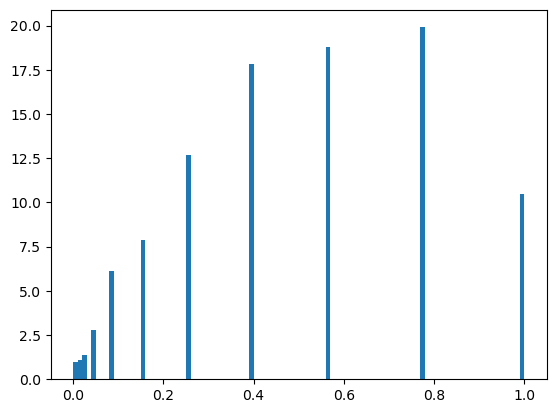

In [6]:
def test6(input):
    n = len(input)

    ts = []         
    for i in range(n):
        if input[i] == '1':
            ts.append(1)
        else:
            ts.append(-1)
    ts_np = np.array(ts)
    fs = np.fft.fft(ts_np)
    
    mags = abs(fs)[:math.floor(n/2)]
    
    T = math.sqrt(math.log(1.0/0.05)*n)  
    N0 = 0.95*n/2.0  
    N1 = 0.0  
    for mag in mags:
        if mag < T:
            N1 += 1.0
            
    d = (N1 - N0)/math.sqrt((n*0.95*0.05)/4)
    
    p_value = math.erfc(abs(d)/math.sqrt(2))
    
    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test6(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True) 
plt.show()

bad strings amount:  17
bad strings ratio:  0.017


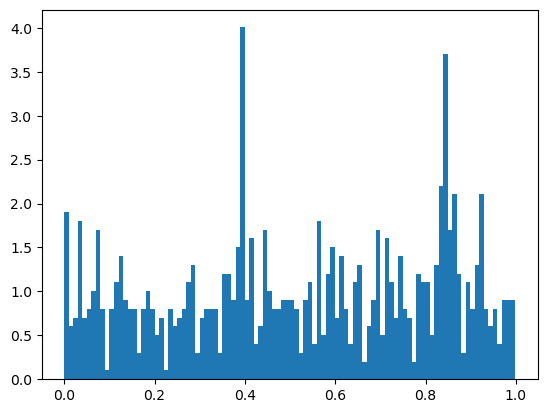

In [7]:
def test7(input):
    n = len(input)

    templates = [None for x in range(7)]
    templates[0] = [[0,1],[1,0]]
    templates[1] = [[0,0,1],[0,1,1],[1,0,0],[1,1,0]]
    templates[2] = [[0,0,0,1],[0,0,1,1],[0,1,1,1],[1,0,0,0],[1,1,0,0],[1,1,1,0]]
    templates[3] = [[0,0,0,0,1],[0,0,0,1,1],[0,0,1,0,1],[0,1,0,1,1],[0,0,1,1,1],[0,1,1,1,1],
                    [1,1,1,0,0],[1,1,0,1,0],[1,0,1,0,0],[1,1,0,0,0],[1,0,0,0,0],[1,1,1,1,0]]
    templates[4] = [[0,0,0,0,0,1],[0,0,0,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,1],[0,0,1,0,1,1],
                    [0,0,1,1,0,1],[0,0,1,1,1,1],[0,1,0,0,1,1],
                    [0,1,0,1,1,1],[0,1,1,1,1,1],[1,0,0,0,0,0],
                    [1,0,1,0,0,0],[1,0,1,1,0,0],[1,1,0,0,0,0],
                    [1,1,0,0,1,0],[1,1,0,1,0,0],[1,1,1,0,0,0],
                    [1,1,1,0,1,0],[1,1,1,1,0,0],[1,1,1,1,1,0]]
    templates[5] = [[0,0,0,0,0,0,1],[0,0,0,0,0,1,1],[0,0,0,0,1,0,1],[0,0,0,0,1,1,1],
                    [0,0,0,1,0,0,1],[0,0,0,1,0,1,1],[0,0,0,1,1,0,1],[0,0,0,1,1,1,1],
                    [0,0,1,0,0,1,1],[0,0,1,0,1,0,1],[0,0,1,0,1,1,1],[0,0,1,1,0,1,1],
                    [0,0,1,1,1,0,1],[0,0,1,1,1,1,1],[0,1,0,0,0,1,1],[0,1,0,0,1,1,1],
                    [0,1,0,1,0,1,1],[0,1,0,1,1,1,1],[0,1,1,0,1,1,1],[0,1,1,1,1,1,1],
                    [1,0,0,0,0,0,0],[1,0,0,1,0,0,0],[1,0,1,0,0,0,0],[1,0,1,0,1,0,0],
                    [1,0,1,1,0,0,0],[1,0,1,1,1,0,0],[1,1,0,0,0,0,0],[1,1,0,0,0,1,0],
                    [1,1,0,0,1,0,0],[1,1,0,1,0,0,0],[1,1,0,1,0,1,0],[1,1,0,1,1,0,0],
                    [1,1,1,0,0,0,0],[1,1,1,0,0,1,0],[1,1,1,0,1,0,0],[1,1,1,0,1,1,0],
                    [1,1,1,1,0,0,0],[1,1,1,1,0,1,0],[1,1,1,1,1,0,0],[1,1,1,1,1,1,0]]
    templates[6] = [[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,1],[0,0,0,0,0,1,0,1],[0,0,0,0,0,1,1,1],
                    [0,0,0,0,1,0,0,1],[0,0,0,0,1,0,1,1],[0,0,0,0,1,1,0,1],[0,0,0,0,1,1,1,1],
                    [0,0,0,1,0,0,1,1],[0,0,0,1,0,1,0,1],[0,0,0,1,0,1,1,1],[0,0,0,1,1,0,0,1],
                    [0,0,0,1,1,0,1,1],[0,0,0,1,1,1,0,1],[0,0,0,1,1,1,1,1],[0,0,1,0,0,0,1,1],
                    [0,0,1,0,0,1,0,1],[0,0,1,0,0,1,1,1],[0,0,1,0,1,0,1,1],[0,0,1,0,1,1,0,1],
                    [0,0,1,0,1,1,1,1],[0,0,1,1,0,1,0,1],[0,0,1,1,0,1,1,1],[0,0,1,1,1,0,1,1],
                    [0,0,1,1,1,1,0,1],[0,0,1,1,1,1,1,1],[0,1,0,0,0,0,1,1],[0,1,0,0,0,1,1,1],
                    [0,1,0,0,1,0,1,1],[0,1,0,0,1,1,1,1],[0,1,0,1,0,0,1,1],[0,1,0,1,0,1,1,1],
                    [0,1,0,1,1,0,1,1],[0,1,0,1,1,1,1,1],[0,1,1,0,0,1,1,1],[0,1,1,0,1,1,1,1],
                    [0,1,1,1,1,1,1,1],[1,0,0,0,0,0,0,0],[1,0,0,1,0,0,0,0],[1,0,0,1,1,0,0,0],
                    [1,0,1,0,0,0,0,0],[1,0,1,0,0,1,0,0],[1,0,1,0,1,0,0,0],[1,0,1,0,1,1,0,0],
                    [1,0,1,1,0,0,0,0],[1,0,1,1,0,1,0,0],[1,0,1,1,1,0,0,0],[1,0,1,1,1,1,0,0],
                    [1,1,0,0,0,0,0,0],[1,1,0,0,0,0,1,0],[1,1,0,0,0,1,0,0],[1,1,0,0,1,0,0,0],
                    [1,1,0,0,1,0,1,0],[1,1,0,1,0,0,0,0],[1,1,0,1,0,0,1,0],[1,1,0,1,0,1,0,0],
                    [1,1,0,1,1,0,0,0],[1,1,0,1,1,0,1,0],[1,1,0,1,1,1,0,0],[1,1,1,0,0,0,0,0],
                    [1,1,1,0,0,0,1,0],[1,1,1,0,0,1,0,0],[1,1,1,0,0,1,1,0],[1,1,1,0,1,0,0,0],
                    [1,1,1,0,1,0,1,0],[1,1,1,0,1,1,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,0],
                    [1,1,1,1,0,1,0,0],[1,1,1,1,0,1,1,0],[1,1,1,1,1,0,0,0],[1,1,1,1,1,0,1,0],
                    [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0]]
    
    r = random.SystemRandom()
    template_list = r.choice(templates)
    B = r.choice(template_list)
    
    m = len(B)
    
    N = 8
    M = math.floor(n/N)
    
    blocks = []
    for i in range(N):
        block = []
        for j in range(M):
            block.append(int(input[i*M+j],2))
        blocks.append(block)

    W = []
    for block in blocks:
        position = 0
        count = 0
        while position < (M-m):
            if block[position:position+m] == B:
                position += m
                count += 1
            else:
                position += 1
        W.append(count)

    mu = float(M-m+1)/float(2**m)
    sigma = M * ((1.0/float(2**m))-(float((2*m)-1)/float(2**(2*m))))

    chi_sq = 0.0
    for j in range(N):
        chi_sq += ((W[j] - mu)**2)/sigma

    p_value = ss.gammaincc(N/2.0, chi_sq/2.0)

    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test7(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True) 
plt.show()

bad strings amount:  17
bad strings ratio:  0.017


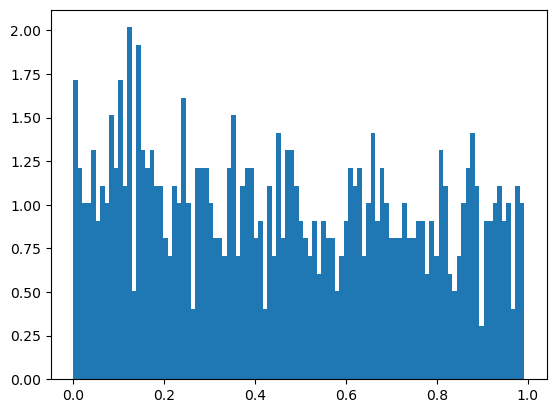

In [8]:
def test12(input):
    n = len(input)

    m = int(math.floor(math.log(n,2)))-6
    if m < 2:
        m = 2
    if m >3 :
        m = 3
    
    Cmi = []
    phi_m = []
    for iterm in range(m,m+2):
        padded_input=input+input[0:iterm-1]
    
        counts = []
        for i in range(2**iterm):
            count = 0
            for j in range(n):
                if int(padded_input[j:j+iterm],2) == i:
                    count += 1
            counts.append(count)
    
        Ci = []
        for i in range(2**iterm):
            Ci.append(float(counts[i])/float(n))     
        Cmi.append(Ci)
    
        sum = 0.0
        for i in range(2**iterm):
            if (Ci[i] > 0.0):
                sum += Ci[i]*math.log((Ci[i]/10.0))
        phi_m.append(sum)
        
    appen_m = phi_m[0] - phi_m[1]

    chisq = 2*n*(math.log(2) - appen_m)

    p_value = ss.gammaincc(2**(m-1),(chisq/2.0))

    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test12(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True)
plt.show()

In [9]:
int('1', 2)

1

bad strings amount:  18
bad strings ratio:  0.018


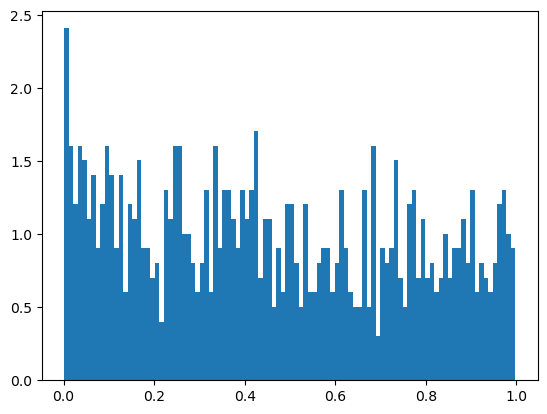

In [10]:
def test15(input):
    n = len(input)

    x = []
    for i in range(n):
        x.append(int(input[i]) * 2 - 1)

    pos = 0
    s = []
    for e in x:
        pos = pos + e
        s.append(pos)  
    sprime = [0] + s + [0]

    J = 0
    for value in sprime[1:]:
        if value == 0:
            J += 1
            
    count = [0 for x in range(-9,10)]
    for value in sprime:
        if (abs(value) < 10):
            count[value] += 1

    plist = []
    p_average = 0.0
    for x in range(-9,10): 
        if x != 0:
            top = abs(count[x]-J)
            bottom = math.sqrt(2.0 * J *((4.0*abs(x))-2.0))
            p = ss.erfc(top/bottom)


            p_average += p
            plist.append(p)

    p_value = p_average / 19

    return p_value


count_bad = 0
num_test = 1000
res_list = []

for _ in range(num_test):
    res_str = generate_random_random_bits(num_floats)
    res = test12(res_str)
    res_list.append(res)
    if res < 0.01:
        count_bad += 1

print('bad strings amount: ', count_bad)
print('bad strings ratio: ', count_bad/num_test)

plt.hist(res_list, bins = 100, density = True)
plt.show()